# **Caminata Aleatoria simple**

In [13]:
#install.packages('tidyr')
#install.packages('plotly')
library('ggplot2')
library("tidyr")
library("ggplot2")
library("plotly")
options(repr.plot.width=16, repr.plot.height=8)

La caminata aleatoria en $\mathbb{Z}$, es la más simple de todas, de ahí su nombre. $X_i$ toma valores en $\{−1,1\}$, y la caminata comienza en $S_n = 0$ y está definida para valores enteros. Las probabilidades de ir a la derecha o a la izquierda se denotan como $P(X_i=1)$ y $P(X_i=-1)$, respectivamente, con las siguientes probabilidades para el caso de una caminata aleatoria simétrica:


\begin{equation*}
P(X_i=1)=P(X_i=−1)=1/2
\end{equation*}


Considerando el caso más general, se tiene que el caminante puede ir a la derecha con probabilidad $p$, y a la izquierda con probabilidad $1-p$


\begin{equation*}
P(X_i=1)=p \ \text{  y  } \  P(X_i=−1)=1−p
\end{equation*}

<img src='caminata2.png'>

Vamos a definir a $S_n$ como la suma que toma la caminata al paso $n$ de la siguiente manera


\begin{equation}
Sn = S_{n-1} + X_n, \ \ n \geq 1, \ \ S_0=0
\end{equation}

La posición a $n$ pasos puede definirse como

\begin{equation}
S_n  =  \sum_{i=1}^n X_i
\end{equation}

**Valor esperado**


$$E(S_n)   =  E\left(\sum_{i=1}^n X_i \right)$$
$$  \ \ \  \ \ \ \   =  \sum_{i=1}^n E\left( X_i \right)$$
$$  \ \ \   \    =  n E\left( X_i \right)$$
$$   \ \ \  \ \ \ \ \ \     =  n\left( (1)(p) + (-1)(1-p) \right)$$
$$     \ \ \ \ \ \    =  n(2p-1)$$


**Varianza**

$$Var(S_n)   =  Var\left(\sum_{i=1}^n X_i \right)$$
$$   \ \ \ \ \ \ \ \ \ \ \     =  \sum_{i=1}^n Var\left( X_i \right)$$
$$    \ \ \ \ \ \ \ \    =  n Var\left( X_i \right)$$
$$     \ \ \  \ \  \ \ \ \ \  \  =  n \left[E[X_i^2] - \left(X_i \right)^2 \right]$$
$$    \ \ \ \ \ \ \ \    =  n \left[\left((1)^2(p) + (-1)^2(1-p) \right) - \left(2p-1\right)^2\right]$$
$$   \ \ \  \ \ \ \ \  \ \ \    =  n \left[4p(1-p)\right]$$
$$    \ \ \  \ \ \ \ \  \ \    =  4np(1-p)$$



In [24]:
# function para simular una caminata aleatoria
caminata.aleatoria.simple <- function(n.pasos, n.trajectorias, p=0.5){
  # Inputs:  
  #     n.pasos         : numero de pasos realizados.  
  #     n.trajectorias  : número de trjectorias.  
  #     p               : probabilidad de ir a la derecha.
  # Outputs:
  #     matriz          : data.frame donde las columnas indican el número de pasos y las filas el número de trajectorias
  
  # definimos movimiento
  x.right = 1
  x.left = -1
  # inicializamos la matriz
  Sn_mat <- matrix(0, ncol=n.pasos+1, nrow=n.trajectorias)
  # for loop
  for(i in 1:n.trajectorias){
    for(j in 2:(n.pasos + 1)){
      step <- sample(c(x.left,x.right),1,prob=c(1-p,p),replace=F)
      Sn_mat[i,j] <- Sn_mat[i,j-1] + step  
    }
  }
  # data frame
  result_df <- data.frame('traject'=sapply(1:n.trajectorias, function(i) paste('traject',i,sep='')),
                          'Sn'=Sn_mat)
  colnames(result_df) <- c('traject', sapply(0:n.pasos, function(i) paste('Sn.', i, sep='')))
  return(result_df)
}

## Simulación :

In [25]:
#######  Ejemplo:
n.pasos <- 10000          # numero de pasos
n.trajectorias <- 500     # nnumero de trajectorias
p <- 0.5                  # probabilidad de ir hacia la derecha

In [26]:
# sumulación
df <- caminata.aleatoria.simple(n.pasos, n.trajectorias, p)
head(df)

,traject,Sn.0,Sn.1,Sn.2,Sn.3,Sn.4,Sn.5,Sn.6,Sn.7,Sn.8,⋯,Sn.9991,Sn.9992,Sn.9993,Sn.9994,Sn.9995,Sn.9996,Sn.9997,Sn.9998,Sn.9999,Sn.10000
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,traject1,0,1,0,1,2,1,0,1,2,⋯,-67,-66,-67,-66,-65,-66,-65,-64,-63,-62
2,traject2,0,-1,-2,-3,-2,-3,-4,-5,-6,⋯,-57,-56,-55,-56,-55,-54,-55,-56,-55,-56
3,traject3,0,-1,0,-1,0,1,0,1,0,⋯,51,52,53,52,53,52,51,50,51,52
4,traject4,0,-1,-2,-3,-4,-5,-4,-3,-4,⋯,-155,-156,-157,-158,-159,-158,-159,-158,-159,-158
5,traject5,0,1,2,3,4,5,6,5,4,⋯,-29,-28,-29,-28,-29,-30,-29,-30,-31,-30
6,traject6,0,1,0,-1,0,-1,0,1,0,⋯,71,72,71,70,71,72,71,72,73,74


In [28]:
## Data frame 
df_rw <- df  %>%
  gather(key='t',value='valor',-traject) %>%
  mutate(t = as.numeric(substring(t,4,10))) %>%
  arrange(traject)
  
# Media y desviación estándar
moments_rw <- data.frame('t'=c(1:n.pasos),'p'=p) %>%
  mutate('mean'=t*(p-(1-p)),
         'sd_sup'=mean + 2*sqrt(4*t*p*(1-p)),
         'sd_inf'=mean - 2*sqrt(4*t*p*(1-p)))

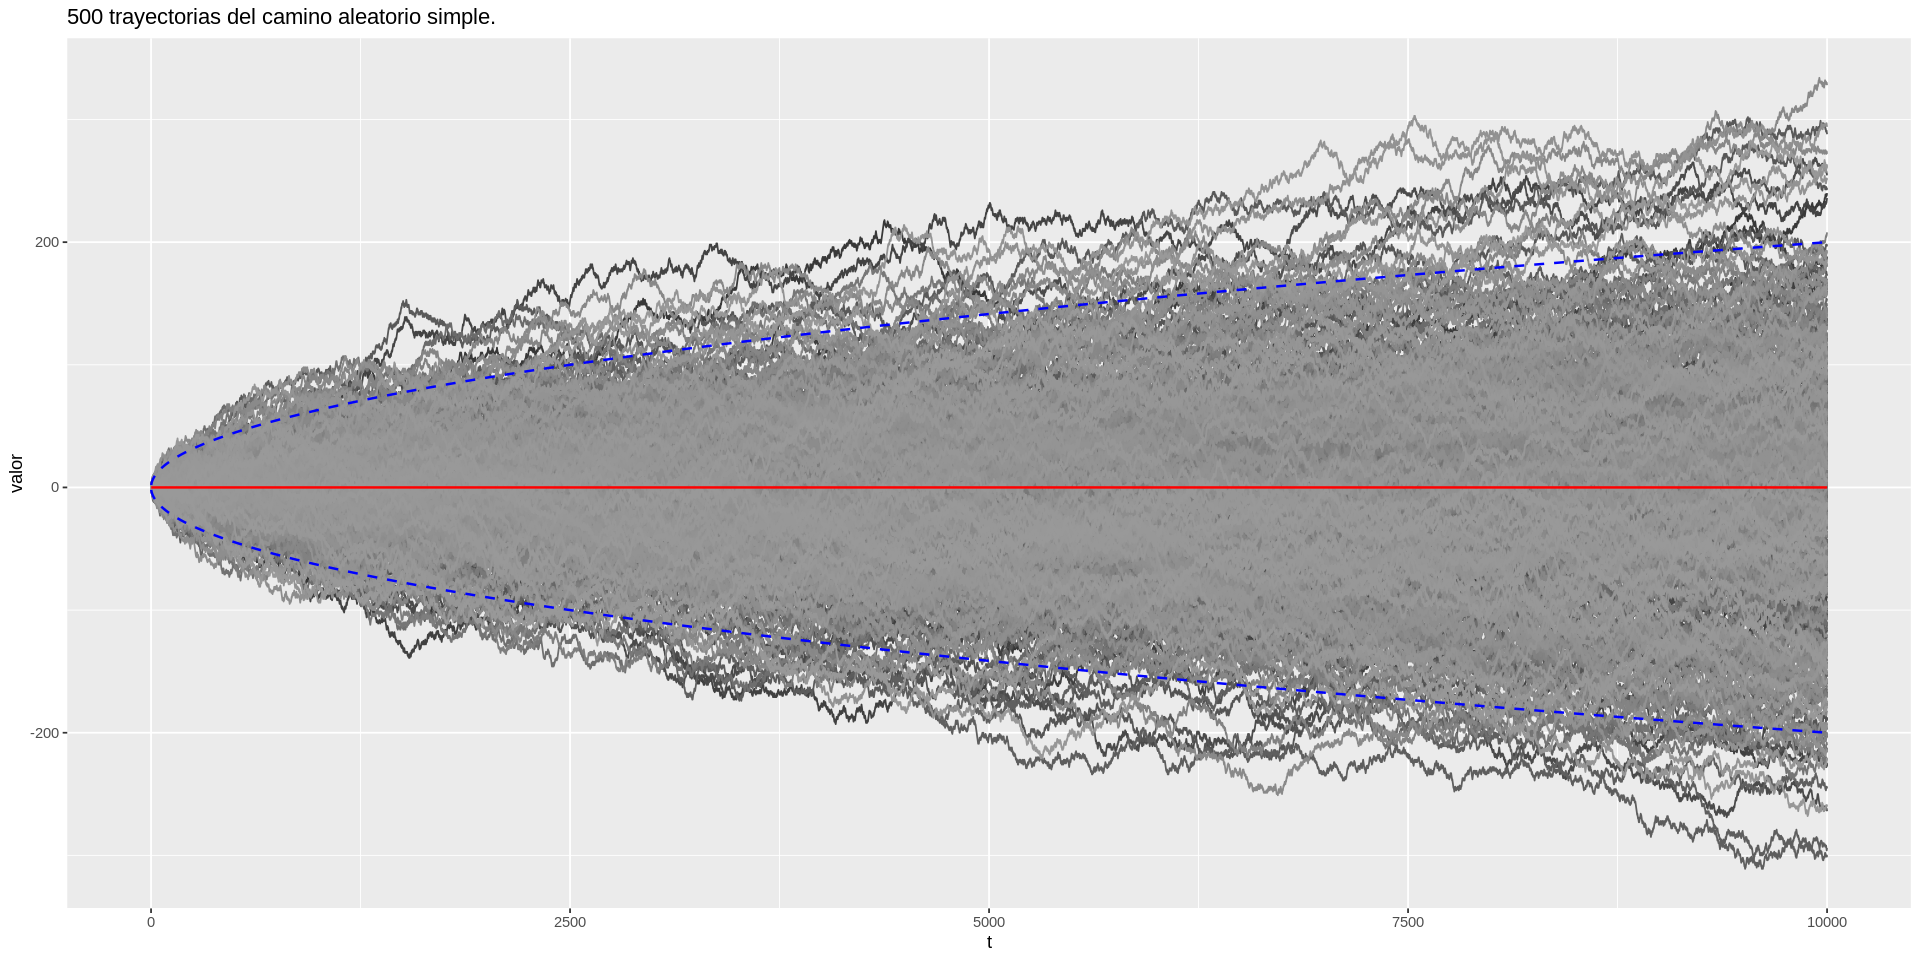

In [32]:
# gráfico de trajectorias
p1 <- ggplot(df_rw,aes(x=t,y=valor,color=traject)) +
  geom_line() +
  geom_line(moments_rw, mapping=aes(x=t,y=mean),col='red',size=0.7) +
  geom_line(moments_rw, mapping=aes(x=t,y=sd_sup),col='blue',size=0.7,linetype = "dashed") +
  geom_line(moments_rw, mapping=aes(x=t,y=sd_inf),col='blue',size=0.7,linetype = "dashed") +
  scale_colour_grey(start = 0.2,end = 0.6) +
  theme(legend.position="none") +
  ggtitle(paste(n.trajectorias," trayectorias del camino aleatorio simple.",sep=''))

print(p1)